data: {'1': 513, '0': 511}
detail info: {'id': '2c2f3b02-f241-4a9a-b28d-0d1e5009249d', 'state': 'completed', 'at': 1720595628271688.5, 'shots': 1024, 'device': 'testing', 'results': {'0': 511, '1': 513}}
   ┌───┐┌───────┐
q: ┤ H ├┤ Rz(0) ├
   └───┘└───────┘


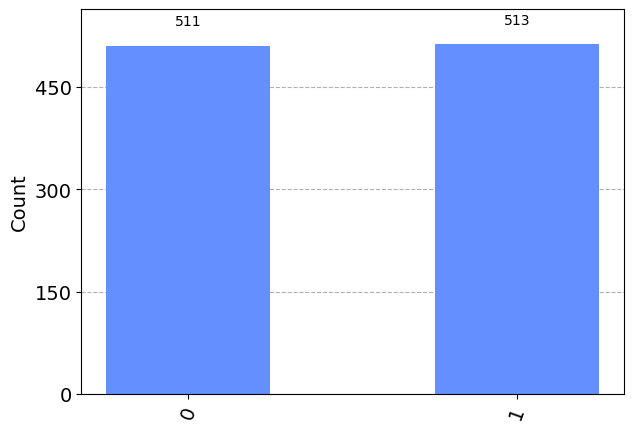

In [2]:
import tensorcircuit as tc
from tensorcircuit.cloud import apis
apis.set_provider("local")

# 调用本地code进行电路模拟
c = tc.Circuit(1)
c.H(0)
c.rz(0, theta=0)
U = c.matrix() # 量子门电路对应的矩阵
states = c.state() # 输出量子态
t = apis.submit_task(circuit=c, device="testing", shots=1024)
data = t.results(blocked=True) #产生0，1态的结果分布
print('data:', data)
detail = t.details() # 产生详细的参数信息
print("detail info:", t.details())

print(c.draw()) #电路可视化图像输出,可选 c.draw(output='mpl')
counts = t.results()
tc.results.counts.plot_histogram(counts) #柱状结果分布

theta: 1.2815075663824271


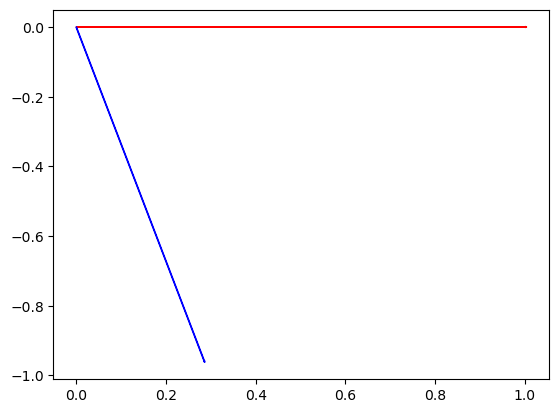

In [1]:
#2.1
import numpy as np
from scipy import linalg as la
import random
def R(theta):
    return np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
theta = random.random() * np.pi
v = np.array([1, 0])
v_ = R(theta) @ v
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.arrow(0, 0, v[0], v[1], color = 'red')
ax.arrow(0, 0, v_[0], v_[1], color = 'blue')
print(f"theta: {theta}")
plt.show()

##### Geometric Interpretation of the Operation in 2.1:
Rotate the vector $v$ clockwise by $\theta$.

In [2]:
#2.2
pauli_matrices = [np.array([[0, 1], [1, 0]]), np.array([[0, -1j], [1j, 0]]),
                  np.array([[1, 0], [0, -1]])]
theta = random.random() * np.pi
for p in pauli_matrices:
    I = np.eye(2)
    lhs = la.expm(1j * theta * p)
    rhs = np.cos(theta) * I + 1j * np.sin(theta) * p
    np.testing.assert_allclose(lhs, rhs, atol = 1e-8)

##### Analytic Proof of the Formula in 2.2:
Assume that $\hat{P}^2 = I$, i.e., $\hat{P}$ is involutory.\
Therefore, $$e^{i \theta \hat{P}} = \sum_{j \geq 0}\frac{(i \theta \hat{P})^j}{j!}
\\=\sum_{j\ is\ even}\frac{(i \theta)^j I}{j!} + \sum_{j\ is\ odd}\frac{(i \theta)^j \hat{P}}{j!}
\\=\cos(\theta) I + i \sin(\theta) \hat{P}$$
Specifically, when $\hat{P}$ is a Pauli matrix, it's involutory, so the formula is satisfied.

i = 0, j = 0


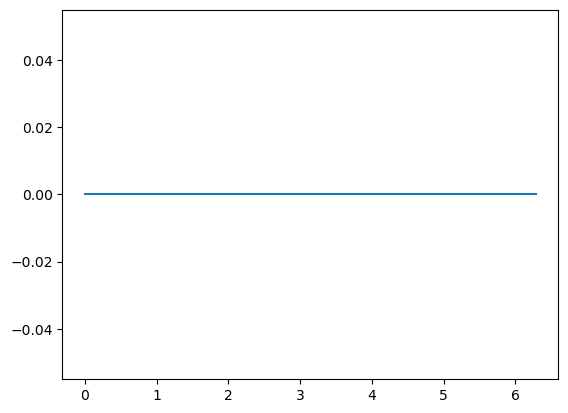

i = 0, j = 1


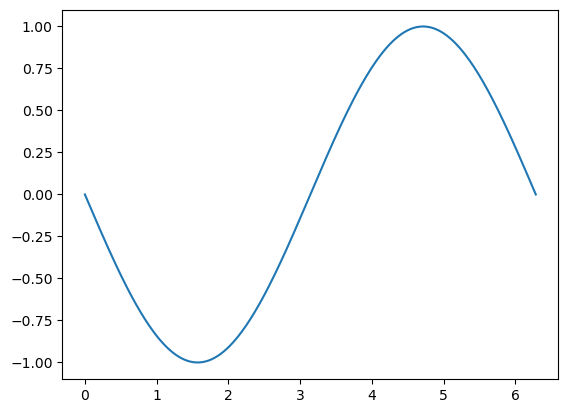

i = 0, j = 2


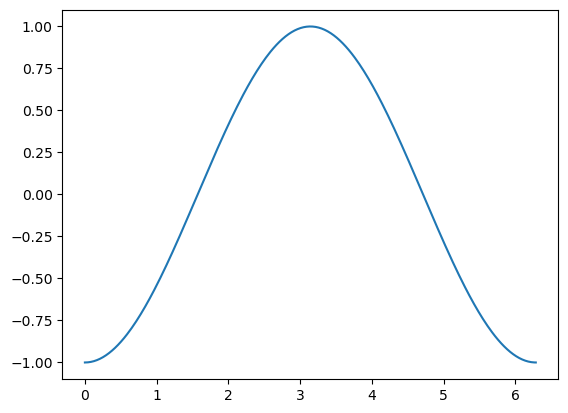

i = 1, j = 0


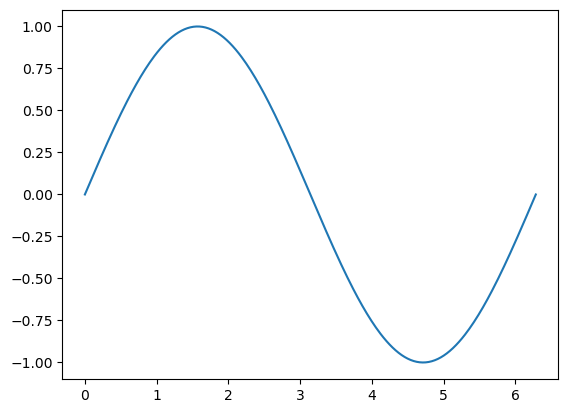

i = 1, j = 1


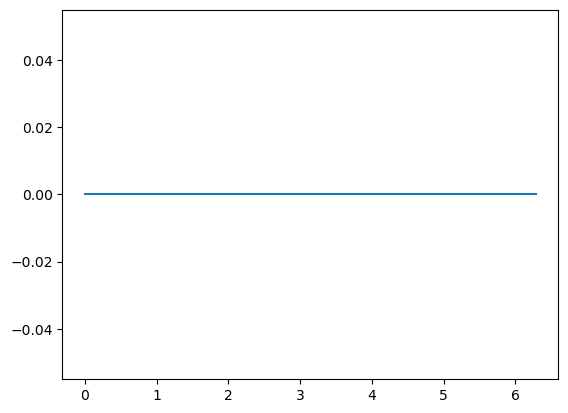

i = 1, j = 2


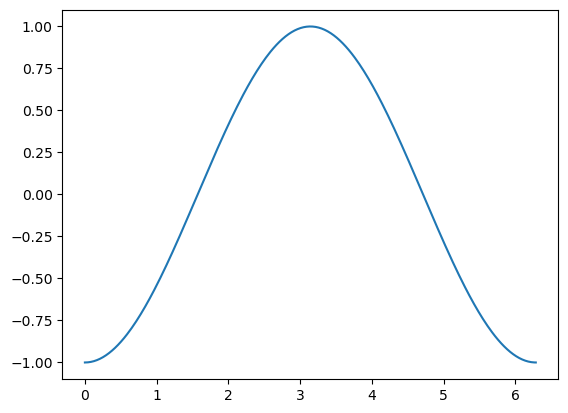

i = 2, j = 0


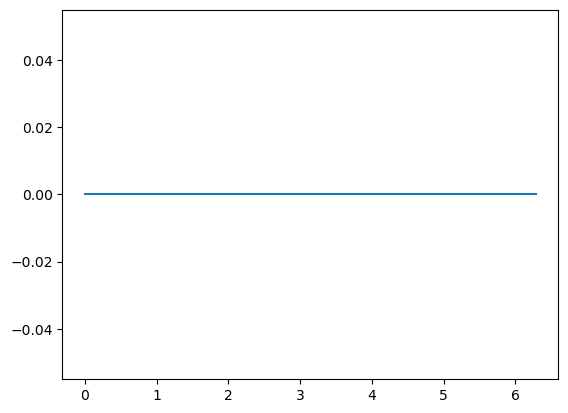

i = 2, j = 1


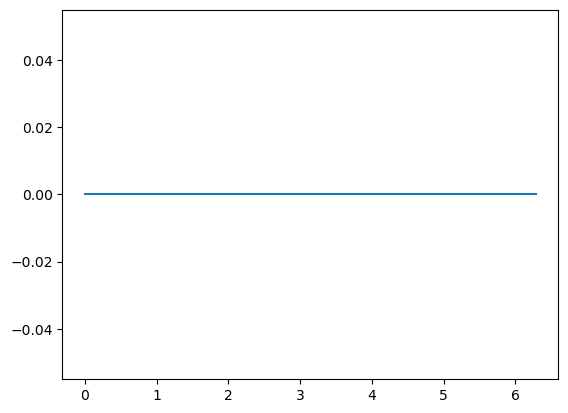

i = 2, j = 2


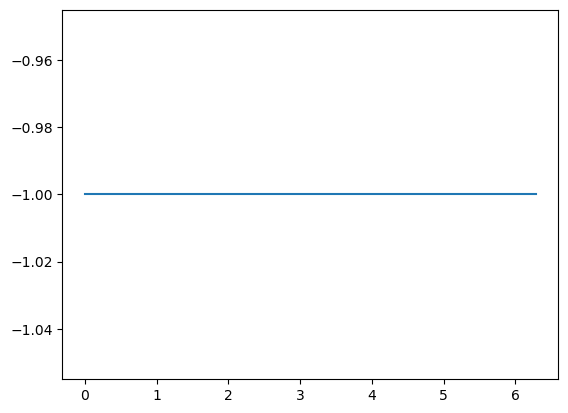

In [6]:
#2.3
pauli_matrices = [np.array([[0, 1], [1, 0]]), np.array([[0, -1j], [1j, 0]]),
                  np.array([[1, 0], [0, -1]])]
v0 = np.array([0, 1])
for i in range(3):
    P = pauli_matrices[i]
    for j in range(3):
        Q = pauli_matrices[j]
        def expectation(theta):
            v = la.expm(1j * theta / 2 * P) @ v0
            return (v.conj().T @ Q @ v).real
        num = 300
        theta = np.linspace(0, np.pi * 2, num)
        f = np.zeros(num)
        for k in range(num):
            f[k] = expectation(theta[k])
        print(f"i = {i}, j = {j}")
        plt.plot(theta, f)
        plt.show()

##### Patterns of the Curves in 2.3
When $\hat{P} = \hat{Q}$ or $\hat{Q} = \sigma_z$, the curve is a straight line.\
Otherwise, the curve has the same shape as trigonometric function.

# a
